In [10]:
import numpy as np 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [11]:
from utility_fn import train_test_split
from normalize import log_norm
#from utility_fn import trial_krn

In [49]:
en = np.linspace(0.3, 7.0 , 128)
data = np.loadtxt('data/data_spectrum.csv')
params = np.loadtxt('data/params_spectrum.csv')
print(data.shape)
print(params.shape)
data = log_norm(data)
data_noisy = data + 0.5*np.random.normal(size = data.shape)

(10000, 128)
(10000, 2)


In [50]:
(x_train,y_train) , (x_test,y_test) = train_test_split(data , params , 0.2)
x_train_noisy = x_train+0.4*np.random.normal(size=x_train.shape)
x_test_noisy = x_test+0.4*np.random.normal(size=x_test.shape)

In [51]:
enc_inputs = keras.Input(shape=(128 , ))
x = layers.Dense(64 , activation='relu')(enc_inputs)
x = layers.Dense(64, activation='relu')(x)
enc_outputs = layers.Dense(32, activation='relu')(x)

x = layers.Dense(64 , activation='relu')(enc_outputs)
x =  layers.Dense(64 , activation='relu')(x)
x = layers.Dense(128)(x)
dec_outputs = layers.LeakyReLU(alpha = 0.7)(x)
encoder = keras.Model(inputs=enc_inputs , outputs=enc_outputs , name = 'encoder')
#encoder.summary()
auto_encoder = keras.Model(inputs=enc_inputs , outputs=dec_outputs , name = 'autoencoder')
auto_encoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 128)]             0         
_________________________________________________________________
dense_24 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_25 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_26 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_27 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_28 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_29 (Dense)             (None, 128)               

In [52]:
auto_encoder.compile(loss='mean_squared_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

In [53]:
auto_encoder.fit(x_train , x_train , validation_split=0.3 , epochs = 30)

Epoch 1/30
175/175 [==============================] - 0s 3ms/step - loss: 0.0534 - val_loss: 2.1044e-04
Epoch 2/30
175/175 [==============================] - 0s 2ms/step - loss: 2.0037e-04 - val_loss: 1.7867e-04
Epoch 3/30
175/175 [==============================] - 0s 2ms/step - loss: 1.5195e-04 - val_loss: 9.5819e-05
Epoch 4/30
175/175 [==============================] - 0s 2ms/step - loss: 1.1166e-04 - val_loss: 7.1154e-04
Epoch 5/30
175/175 [==============================] - 0s 2ms/step - loss: 9.3373e-05 - val_loss: 4.5541e-05
Epoch 6/30
175/175 [==============================] - 0s 2ms/step - loss: 4.2351e-05 - val_loss: 3.7346e-05
Epoch 7/30
175/175 [==============================] - 0s 2ms/step - loss: 3.3601e-04 - val_loss: 4.6835e-05
Epoch 8/30
175/175 [==============================] - 0s 2ms/step - loss: 3.8104e-05 - val_loss: 3.2884e-05
Epoch 9/30
175/175 [==============================] - 0s 2ms/step - loss: 3.1622e-05 - val_loss: 2.8285e-05
Epoch 10/30
175/175 [===========

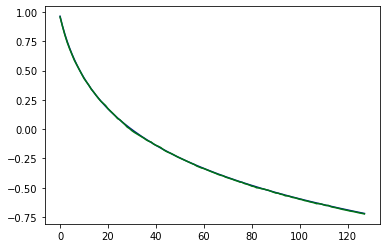

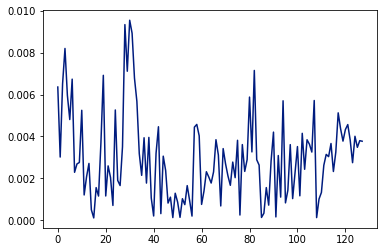

In [54]:
x_recon = auto_encoder.predict(x_test[10:11])

plt.plot(x_test[10:11][0])
plt.plot(x_recon[0])
plt.show()
plt.plot(abs((x_test[10:11][0]-x_recon[0])))
plt.show()

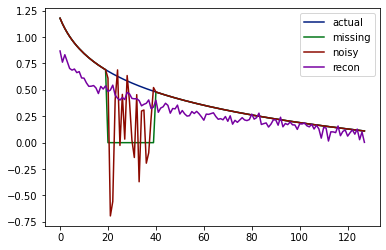

In [55]:
d_missing = np.copy(x_train[0:1])
d_missing[0][20:40] = np.zeros(20)
d_noisy = np.copy(d_missing)
d_noisy[0][20:40] = 0.4*np.random.normal(size=20) 
d_pred = auto_encoder.predict(d_missing)

plt.style.use('seaborn-dark-palette')
plt.plot(x_train[0:1][0] , label = 'actual')
plt.plot(d_missing[0] , label='missing')
plt.plot(d_noisy[0] , label='noisy')
plt.plot(d_pred[0] , label='recon')
plt.legend(['actual' , 'missing' , 'noisy' , 'recon'])
plt.show()
#plt.plot(abs((data[10:11][0]-d_pred[0])))
#plt.show()

In [56]:
pred_model = keras.models.load_model('fc_model')
pred_model.summary()

Model: "regressor"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_43 (InputLayer)        [(None, 128)]             0         
_________________________________________________________________
dense_141 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_142 (Dense)            (None, 64)                4160      
_________________________________________________________________
dense_143 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_144 (Dense)            (None, 2)                 66        
Total params: 14,562
Trainable params: 14,562
Non-trainable params: 0
_________________________________________________________________


In [58]:
proper_pred = pred_model.predict(x_train[0:1])
noisy_pred = pred_model.predict(d_pred)
missing_pred = pred_model.predict(d_missing)
true_p = y_train[0:1]
print(proper_pred)
print(missing_pred)
print(noisy_pred)
print(true_p)

[[1.0112793 1.0290011]]
[[0.793265 4.781451]]
[[0.7975862 3.9907153]]
[[1.00211606 1.03712773]]
